In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# The float lenghts on a lot of these inputs is causing the output to end up in scientific notation
# Going to set a float cap to 3 decimal places for now. Can remove this if it's a problem.
pd.set_option('display.float_format', '{:.3f}'.format)
raw_df = pd.read_csv('nutritional-data.csv')

raw_df.shape

(89010, 61)

In [3]:
# Convert this to a long format so that we don't have a column for each year. 
# This drastically increases the number of rows, but makes the data much cleaner.
data_long = raw_df.melt(id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'],
                      var_name='Year',
                      value_name='Amount')

data_long.shape

(5073570, 6)

In [4]:
data_long.sample(5)

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Amount
728117,Angola,AGO,Male population 45-49,SP.POP.4549.MA,1968,107929.000
2559428,Peru,PER,"Population ages 05-09, female (% of female pop...",SP.POP.0509.FE.5Y,1988,12.945
3980730,Northern Mariana Islands,MNP,"Health expenditure per capita, PPP",SH.XPD.PCAP.PP.KD,2004,NaN
1775823,United Arab Emirates,ARE,Female population 40-44,SP.POP.4044.FE,1979,9751.000
3919394,Europe & Central Asia,ECS,Net migration,SM.POP.NETM,2004,NaN


In [5]:
# There's still a lot of "NaN" in the Amount column so we drop those.

clean_long_df = data_long.dropna(subset=['Amount'])
clean_long_df.sample(10)

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Amount
4650487,Bhutan,BTN,"Population ages 25-29, male (% of male populat...",SP.POP.2529.MA.5Y,2012,11.153
4835200,Colombia,COL,"Age population, age 06, male, interpolated",SP.POP.AG06.MA.IN,2014,399549.000
2304646,Syrian Arab Republic,SYR,"Age population, age 17, female, interpolated",SP.POP.AG17.FE.IN,1985,113341.000
763941,Lebanon,LBN,Female population 55-59,SP.POP.5559.FE,1968,35082.000
3016715,Syrian Arab Republic,SYR,"Age population, age 11, male, interpolated",SP.POP.AG11.MA.IN,1993,197706.000
4445782,Ukraine,UKR,Female population 60-64,SP.POP.6064.FE,2009,1161898.000
352486,United States,USA,"Population ages 50-54, female (% of female pop...",SP.POP.5054.FE.5Y,1963,5.625
517384,Seychelles,SYC,"Population ages 20-24, female (% of female pop...",SP.POP.2024.FE.5Y,1965,6.832
1295991,"Korea, Rep.",KOR,Male population 65-69,SP.POP.6569.MA,1974,225660.000
1725033,Ecuador,ECU,"Age population, age 10, male, interpolated",SP.POP.AG10.MA.IN,1979,104125.000


In [6]:
unique_categories = sorted(clean_long_df['Indicator Name'].unique())
unique_categories

['% of females ages 15-49 having comprehensive correct knowledge about HIV (2 prevent ways and reject 3 misconceptions)',
 '% of males ages 15-49 having comprehensive correct knowledge about HIV (2 prevent ways and reject 3 misconceptions)',
 'AIDS estimated deaths (UNAIDS estimates)',
 'ARI treatment (% of children under 5 taken to a health provider)',
 'Adolescent fertility rate (births per 1,000 women ages 15-19)',
 'Adults (ages 15+) and children (0-14 years) living with HIV',
 'Adults (ages 15+) and children (ages 0-14) newly infected with HIV',
 'Adults (ages 15+) living with HIV',
 'Adults (ages 15+) newly infected with HIV',
 'Age at first marriage, female',
 'Age at first marriage, male',
 'Age dependency ratio (% of working-age population)',
 'Age dependency ratio, old',
 'Age dependency ratio, young',
 'Age population, age 0, female, interpolated',
 'Age population, age 0, male, interpolated',
 'Age population, age 01, female, interpolated',
 'Age population, age 01, male, i

In [7]:
immune_df = clean_long_df[(clean_long_df['Indicator Name'] == 'Immunization, BCG (% of one-year-old children)')]
immune_df.sample(10)

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Amount
4182564,"Yemen, Rep.",YEM,"Immunization, BCG (% of one-year-old children)",SH.IMM.IBCG,2006,67.000
3804789,Papua New Guinea,PNG,"Immunization, BCG (% of one-year-old children)",SH.IMM.IBCG,2002,74.000
2270574,"Iran, Islamic Rep.",IRN,"Immunization, BCG (% of one-year-old children)",SH.IMM.IBCG,1985,79.000
3477729,Latin America & the Caribbean (IDA & IBRD coun...,TLA,"Immunization, BCG (% of one-year-old children)",SH.IMM.IBCG,1999,96.034
2769789,Pacific island small states,PSS,"Immunization, BCG (% of one-year-old children)",SH.IMM.IBCG,1991,91.551
3087189,Myanmar,MMR,"Immunization, BCG (% of one-year-old children)",SH.IMM.IBCG,1994,83.000
4041459,Ethiopia,ETH,"Immunization, BCG (% of one-year-old children)",SH.IMM.IBCG,2005,64.000
2893644,"Iran, Islamic Rep.",IRN,"Immunization, BCG (% of one-year-old children)",SH.IMM.IBCG,1992,99.000
3812379,Slovenia,SVN,"Immunization, BCG (% of one-year-old children)",SH.IMM.IBCG,2002,97.000
1925574,Mali,MLI,"Immunization, BCG (% of one-year-old children)",SH.IMM.IBCG,1981,19.000


In [8]:
sorted_immune_df = immune_df.sort_values(by='Amount')
sorted_immune_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Amount
1888659,Bangladesh,BGD,"Immunization, BCG (% of one-year-old children)",SH.IMM.IBCG,1981,1.000
1977669,Bangladesh,BGD,"Immunization, BCG (% of one-year-old children)",SH.IMM.IBCG,1982,1.000
1857954,Sudan,SDN,"Immunization, BCG (% of one-year-old children)",SH.IMM.IBCG,1980,2.000
2244699,Bangladesh,BGD,"Immunization, BCG (% of one-year-old children)",SH.IMM.IBCG,1985,2.000
2066679,Bangladesh,BGD,"Immunization, BCG (% of one-year-old children)",SH.IMM.IBCG,1983,2.000


In [9]:
bangladesh_data = sorted_immune_df[sorted_immune_df["Country Name"] == 'Bangladesh']
bangladesh_data.sort_values('Year')
bangladesh_data = bangladesh_data.drop(columns = ["Country Code", "Indicator Name", "Indicator Code"])
bangladesh_data

,Country Name,Year,Amount
1888659,Bangladesh,1981,1.000
1977669,Bangladesh,1982,1.000
2244699,Bangladesh,1985,2.000
2066679,Bangladesh,1983,2.000
2155689,Bangladesh,1984,2.000
2333709,Bangladesh,1986,4.000
2422719,Bangladesh,1987,15.000
2511729,Bangladesh,1988,26.000
2600739,Bangladesh,1989,56.000
2689749,Bangladesh,1990,86.000


<function matplotlib.pyplot.plot(*args: 'float | ArrayLike | str', scalex: 'bool' = True, scaley: 'bool' = True, data=None, **kwargs) -> 'list[Line2D]'>

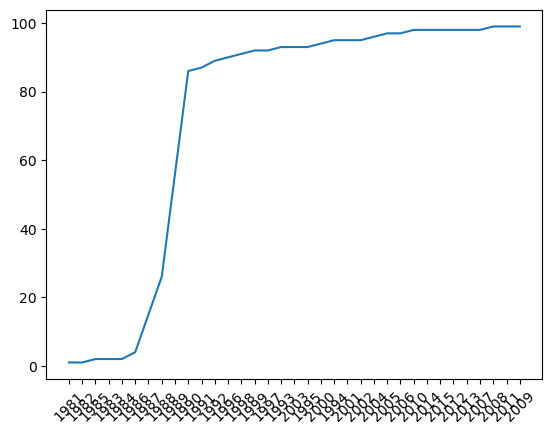

In [10]:
plt.plot(bangladesh_data['Year'],bangladesh_data['Amount'])
plt.xticks(rotation = 45)
plt.plot

In [11]:
lesotho_data = sorted_immune_df[sorted_immune_df["Country Name"] == 'Lesotho']
lesotho_data['Year'] = lesotho_data['Year'].astype(int)
lesotho_data = lesotho_data.sort_values('Year')
lesotho_data = lesotho_data.drop(columns = ["Country Code", "Indicator Name", "Indicator Code"])
lesotho_data

C:\Users\drewc\AppData\Local\Temp\ipykernel_12884\694445290.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lesotho_data['Year'] = lesotho_data['Year'].astype(int)


,Country Name,Year,Amount
1832424,Lesotho,1980,81.000
1921434,Lesotho,1981,81.000
2010444,Lesotho,1982,84.000
2099454,Lesotho,1983,87.000
2188464,Lesotho,1984,89.000
2277474,Lesotho,1985,91.000
2366484,Lesotho,1986,88.000
2455494,Lesotho,1987,84.000
2544504,Lesotho,1988,86.000
2633514,Lesotho,1989,87.000


Text(0.5, 1.0, 'Vaccination Rates in Lesotho')

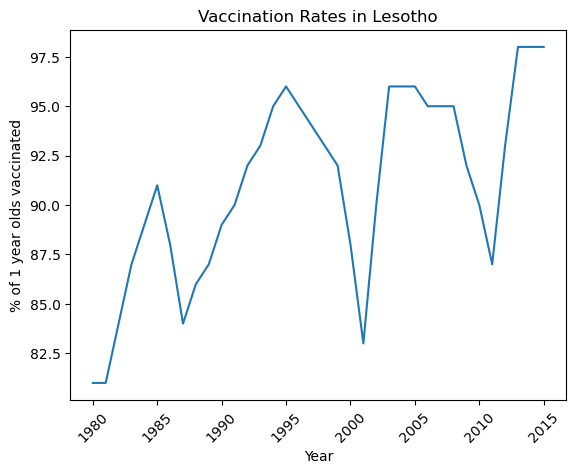

In [14]:
plt.plot(lesotho_data['Year'], lesotho_data['Amount'])
plt.xticks(rotation = 45)
plt.plot
plt.xlabel('Year')
plt.ylabel('% of 1 year olds vaccinated')
plt.title('Vaccination Rates in Lesotho')